# Naive Bayes Algorithm

Author: Sahngyoon Rhee

In this notebook, we shall describe what a Naive Bayes Classifier algorithm is, provide implimentation of different versions of the Naive bayes algorithm, and impliment coding for specific examples.

Naive Bayes Classifier is actually a series of algorithms that uses the Bayes rule

$$ P(Y | X) = \frac{P(X | Y)P(Y)}{P(X)}$$

to get the posterior probability, $P(Y | X)$, from our knowledge or assumption of $P(X | Y), P(Y)$, and $P(X)$.

Suppose we are given a dataset with features $X = (x_1,\dots,x_n)$, where $n$ is the number of features, and with $Y$ a categorical target variable. Given a new datapoint $\vec{x}^{(i)}$ with specific features, we would like to determine what class our new datapoint $\vec{x}^{(i)}$ most likely belongs to.

Here is a more plain description, with an example. Suppose that we are running an Italian wine bar. One day, we are given a wine from Italy, but the precise region of the wine's origin is not marked. Thankfully, we have various devices to measure specific qualities of the wine, such as the alcohol percentage, amount of magnesium, and amount of malic acid (for tart taste). Not only that, we also have the measures of those qualities for all previous wines that we have ever bought, along with their specific region of origin in Italy, and we can also measure those qualities for our unmarked wine. We also have the data of the typical values of those qualities for each region of Italy, as we can easily look up those values online. We also know what percentage of our wines come from what regions of Italy: for example, about 32% of all wines we bring to our restaurant comes from Genova (the specific dataset we will use won't necessarily have this number, but you get the idea).

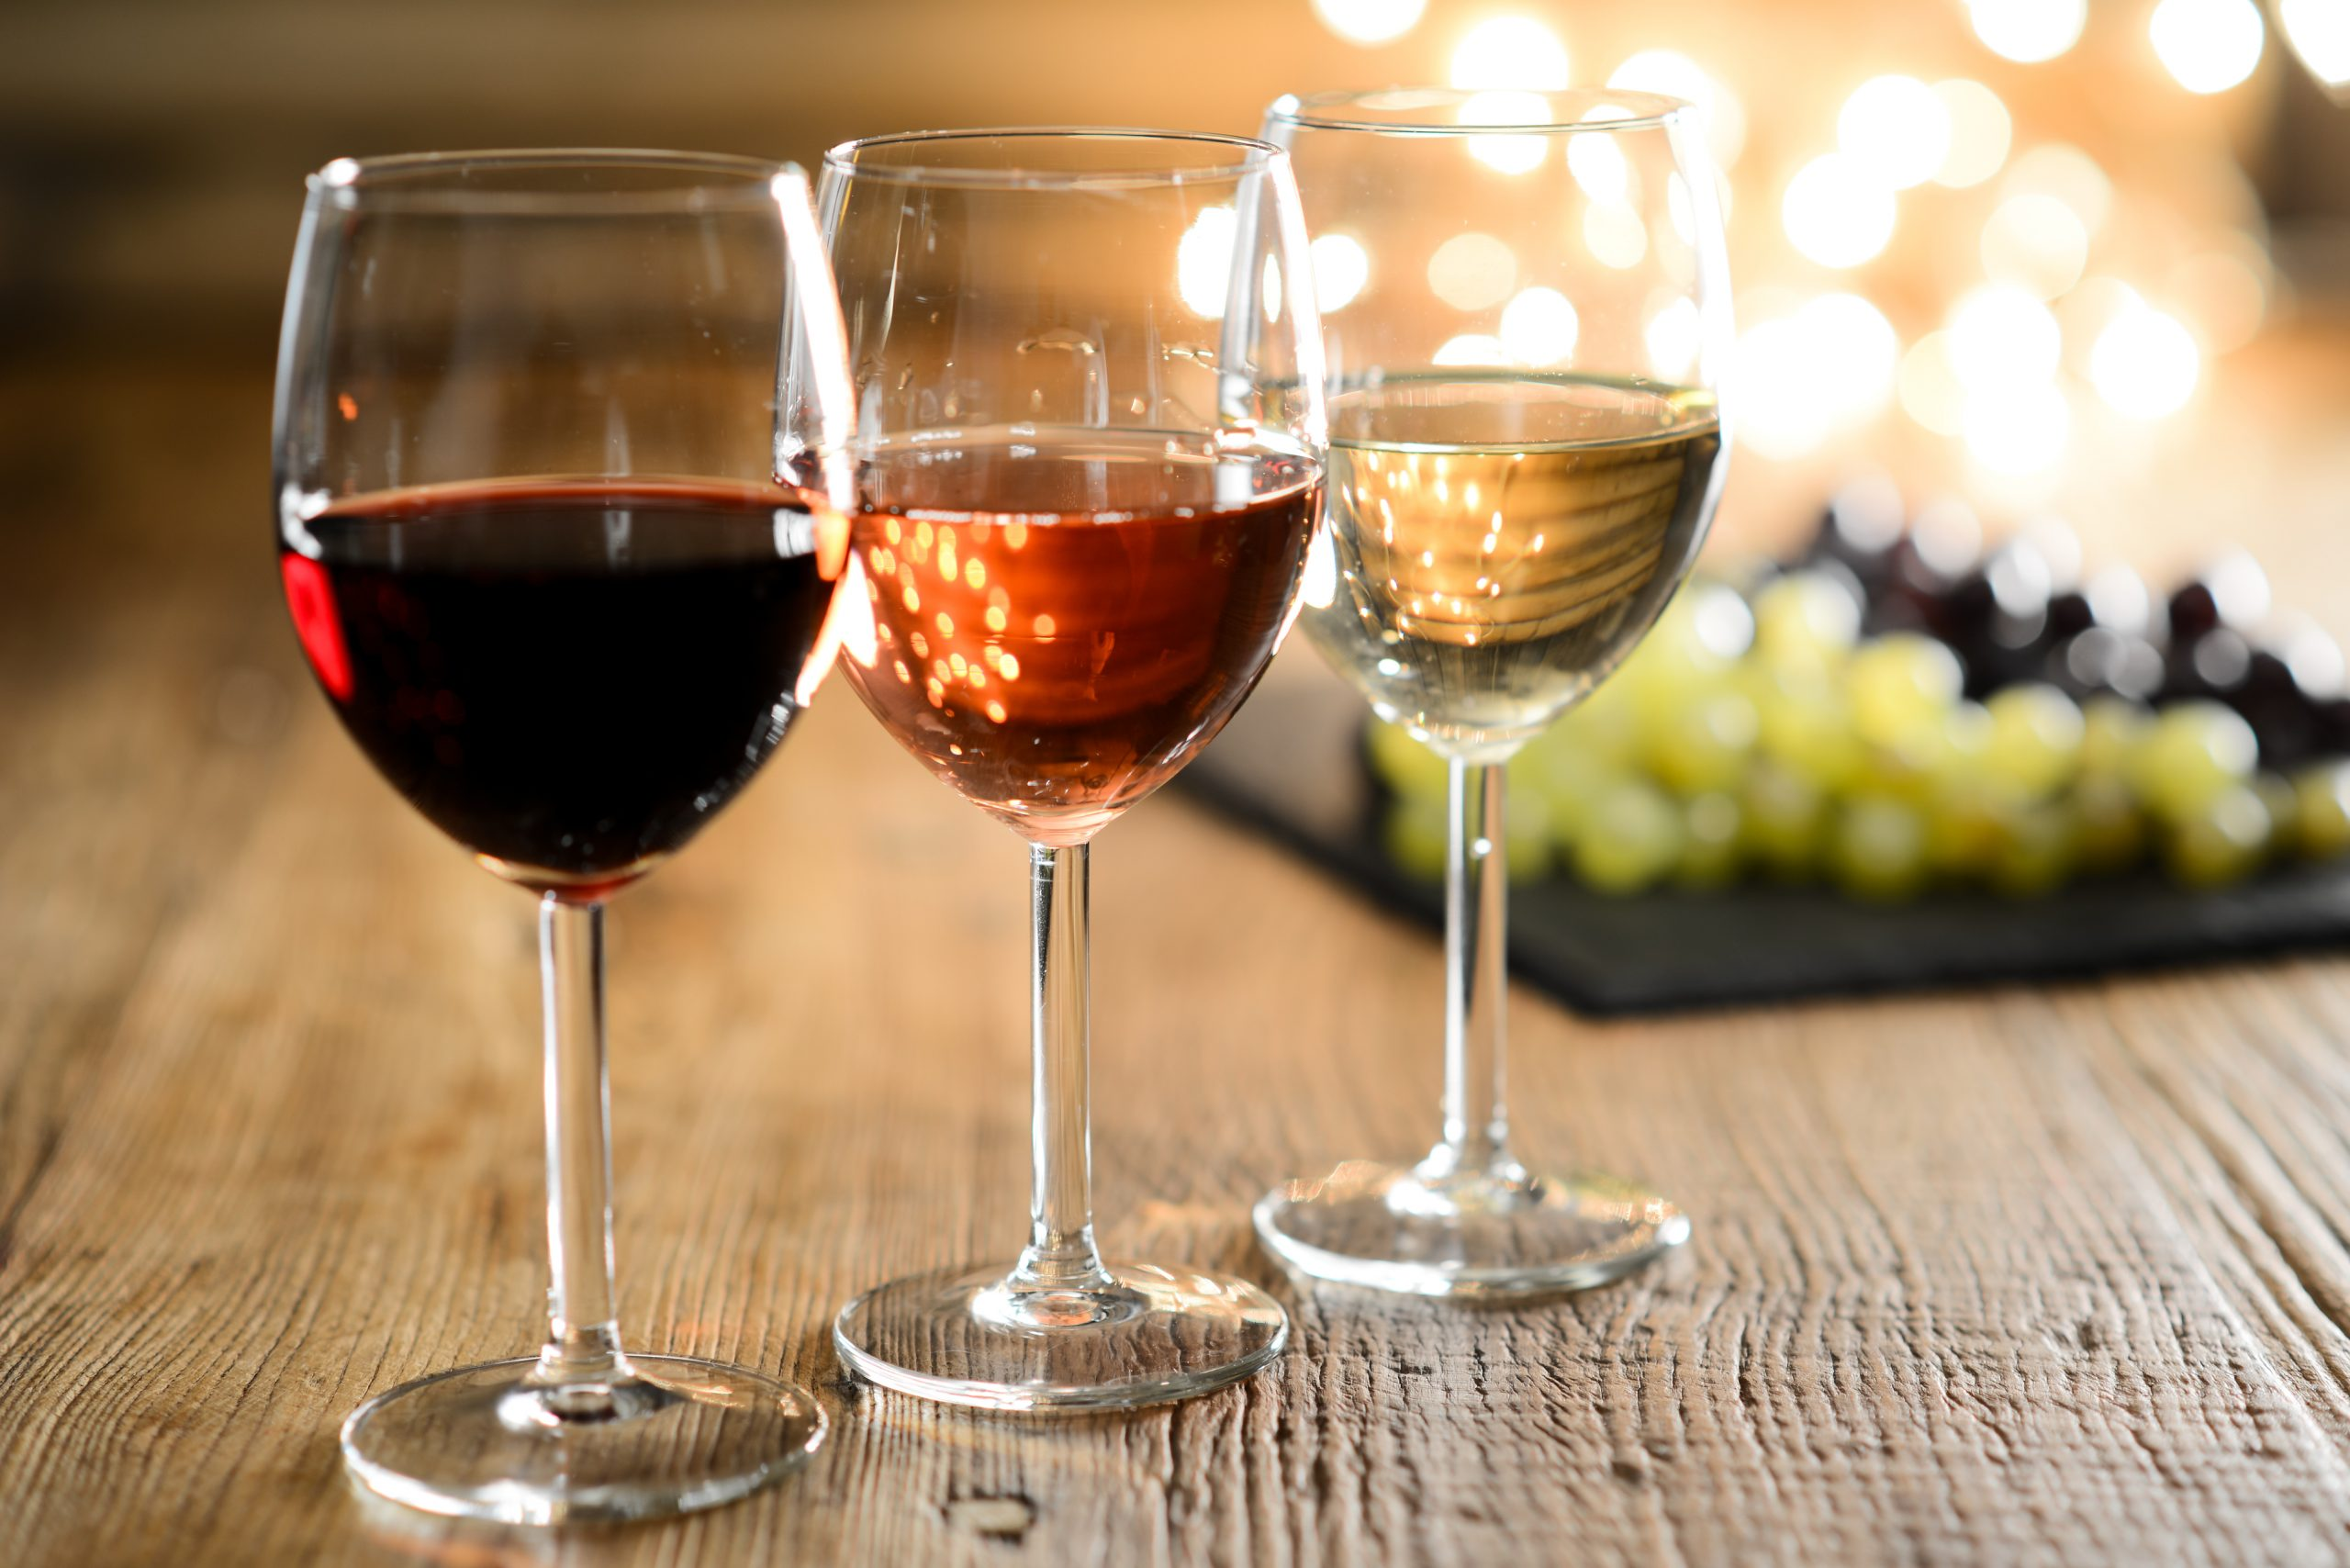

In [1]:
from IPython.display import Image
Image(filename='wine.jpg', width = 400, height = 300)

Based on the information we have, we would like to estimate the most likely region of origin of our unmarked wine. Our original goal was to use all of our data from previous wines we bought, and run a machine learning algorithm (e.g. softmax regression or a neural network) to make our prediction of where the wine might have come from.

Suddenly, someone jumps into our kitchen and yells... "There is a [sommelier](https://en.wikipedia.org/wiki/Sommelier) who just came in, he would like the freshest wine we have! He also wants to know where the wine came from." We check if we can serve some other wine, but alas, we don't have any other wine we bought in for the past year (this probably won't happen in real life, but bear with me for this example lol). And because the sommelier has such a discriminating taste, he will know whether a wine is fresh or not soon after he tastes it. So the only option is to very quickly make a prediction of the region of origin of our wine, and then serve it to him.

Because a machine learning algorithm will take some time to train, that probably won't be a good idea.
Here is where Naive Bayes comes in. If we let $X$ denote the measurements we have for a wine, $Y$ denote the region of origin for the wine, then we quickly realize that we have $P(Y)$ (what percentage of wine comes from a particular region). Since we already have a measurement, $P(X)$ is a constant, and we know or at least can estimate what $P(X | Y)$ is. We can then calculate, for each region of Italy (i.e. for each value of $Y$), the probability $P(Y | \vec{x})$ from Bayes' rule (where $\vec{x}$ is the measurements for our unmarked wine) and then estimate the most likely region as the region of Italy that has the highest $P(Y | \vec{x})$.

That's how Naive Bayes works, explained through an example. In a lot of cases, we actually make an estimate on what $P(X | Y)$ could be; it could be Gaussian or Multinomial, for example. There's also what's called a Complement Naive Bayes, which we will explain more below.

In this notebook, we shall use the `sklearn.naive_bayes` module on datasets related to wines to impliment various naive bayes classification algorithms.

## Assumptions of Naive Bayes

We will use these features and Naive Bayes for classification. Before we begin, though, we want to let you know the assumptions that we must make before implimenting any naive bayes algorithm. Admittedly, many of these assumptions won't be true in a lot of cases, but they are sometimes broad enough assumptions to make in certain cases. Because of these assumptions, we are able to impliment the naive bayes algorithm, which does not use any iterative methods like the gradient descent, and hence makes the naive bayes a fast algorithm to run.

Here are the assumptiosn of naive bayes:

### Feature Independence:
The primary assumption of Naive Bayes is that all features (or attributes) are independent of each other given the class label. This means that the presence or absence of a particular feature does not affect the presence or absence of any other feature.
For example, in the context of the Wine dataset, the algorithm assumes that the alcohol content of the wine is independent of its color intensity, given the type of wine.

### Class Conditional Independence:
Naive Bayes assumes that the effect of an attribute value on a given class is independent of the values of other attributes. This is known as class conditional independence.
For instance, the algorithm assumes that the probability of a wine being of a certain type given its alcohol content is independent of its magnesium content, given the type of wine.

The above two assumption is crucial, since we may then write our naive bayes model concisely as the value of
$$\underset{y}{\textrm{argmax}} \ P(x_1,\dots,x_n | y) = \underset{y}{\textrm{argmax}} \ \frac{\displaystyle\prod_{i=1}^n P(x_i | y) P(y)}{P(x_1)P(x_2) \cdots P(x_n)}$$

where $x_i$s are predictor variables and $y$ is a particular value of the categorical target variable. Indeed, without the above two assumptions, naive bayes would not work at all, since in the implimentation of a naive bayes algorithm, we are using the right hand side of the above equation.

### Equal Importance of Features:
Naive Bayes assumes that all features contribute equally and independently to the outcome. This means that no single feature is considered more important than others in determining the class label.
In the Wine dataset, this means that features like alcohol content, malic acid, and color intensity are all considered equally important in classifying the type of wine.
### No Missing Variables:
Naive Bayes assumes that missingden or latent variables that influence the observed features. All relevant variables are assumed to be included in the dataset.
For example, the algorithm assumes that all factors affecting the type of wine are captured by the features in the dataset.


You can read more about Naive Bayes in the [`sklearn.naive_bayes` module documentation](https://scikit-learn.org/stable/modules/naive_bayes.html).

## Gaussian Naive Bayes

We now impliment the Gaussian Naive Bayes, which assumes that each of our features for each of our $Y$ values has a Guassian distribution for $P(x | Y)$, with the means and variances estimated by Maximum Likelihood Estimation.

In [2]:
# Import necessary libraries
from sklearn.datasets import load_wine
import pandas as pd

# Load the Wine dataset
wine = load_wine()

# Create a DataFrame with the data
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Add the target column
wine_df['target'] = wine.target

# Display the columns and their descriptions
for feature, description in zip(wine.feature_names, wine.DESCR.split('\n')[13:26]):
    print(f'{feature}: {description.strip()}')

alcohol: - Alcalinity of ash
malic_acid: - Magnesium
ash: - Total phenols
alcalinity_of_ash: - Flavanoids
magnesium: - Nonflavanoid phenols
total_phenols: - Proanthocyanins
flavanoids: - Color intensity
nonflavanoid_phenols: - Hue
proanthocyanins: - OD280/OD315 of diluted wines
color_intensity: - Proline
hue: 
od280/od315_of_diluted_wines: - class:
proline: - class_0


According to [the documentation of this dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html), here are what each of the features represent:

- Alcohol: The alcohol content in the wine.
- Malic Acid: The amount of malic acid in the wine, which contributes to the tart taste.
- Ash: The total ash content in the wine, which includes minerals and other non-volatile substances.
- Alcalinity of Ash: The alkalinity of the ash, which is a measure of the wine’s pH balance.
- Magnesium: The magnesium content in the wine, which is an essential mineral.
- Total Phenols: The total phenolic content in the wine, which contributes to the taste, color, and mouthfeel.
- Flavanoids: A type of phenolic compound that contributes to the wine’s color and flavor.
- Nonflavanoid Phenols: Phenolic compounds that are not flavanoids, contributing to the wine’s overall phenolic contein.
- Proanthocyanins: A type of phenolic compound that contributes to the wine’s color and astringency.
- Color Intensity: The intensity of the wine’s color.
- Hue: The hue or shade of the wine's color.
- OD280/OD315 of Diluted Wines: The ratio of optical densities measured at 280 nm and 315 nm, which indicates the wine’s phenolic content.
- Proline: An amino acid found in the wine, which can influence the wine’s taste.

You can click on the hyperlink above for more detailed explanations.

In [3]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# For Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

# load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Fit the model on the training data
gnb.fit(X_train, y_train)

# Predict the labels on the test data
y_pred = gnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Confusion Matrix:
[[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]


## Multinomial Naive Bayes

We now impliment the Multinomial Naive Bayes, which assumes that each of our features for each of the values of $Y$ have a Multinomial distribution. Because multinomial distribution is not continuous unlike the Gaussian distribution, Multinomail naive bayes is most suitable for a classification task with discrete features, such as text classification (e.g. spam email detection).

In our example, we shall use a description of wines as features and use the wine's variety as a target variable. Here, the description of wines is converted into a vector using the bag-of-words method.

In [4]:
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Load the wine reviews dataset
wine_reviews = pd.read_csv('wine_reviews.csv')

# Check for missing values
print("Missing values (remember that a naive bayes cannot have missing values)")
print(wine_reviews.isnull().sum())

# Handle missing values by filling them with an empty string
wine_reviews['description'].fillna('', inplace=True)
wine_reviews['variety'].fillna('Unknown', inplace=True)

# Extract features and labels
X = wine_reviews['description']
y = wine_reviews['variety']

# View a sample of the predictor and target variables
print("")
print("Sample of predictor variables (X):")
print(X.head())
print("\nSample of target variables (y):")
print(y.head())

print(f"There are {len(y.unique())} distinct categories in our classification task.")

Missing values (remember that a naive bayes cannot have missing values)
Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

Sample of predictor variables (X):
0    Aromas include tropical fruit, broom, brimston...
1    This is ripe and fruity, a wine that is smooth...
2    Tart and snappy, the flavors of lime flesh and...
3    Pineapple rind, lemon pith and orange blossom ...
4    Much like the regular bottling from 2012, this...
Name: description, dtype: object

Sample of target variables (y):
0       White Blend
1    Portuguese Red
2        Pinot Gris
3          Riesling
4        Pinot Noir
Name

Now that we have taken a look at our data (its predictor and target variables), we now apply the multinomial naive bayes, `MultinomialNB()` method, to get a classification model.

In [5]:
# Convert text data into a matrix of token counts
vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_counts, y, test_size=0.3)

# Initialize the Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Fit the model on the training data
mnb.fit(X_train, y_train)

# Predict the labels on the test data
y_pred = mnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True, zero_division = 0)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Sort the DataFrame by F1 score in descending order and get the top 50
top_50_f1 = report_df.sort_values(by='f1-score', ascending=False).head(50)

# Print the results
print(f'Accuracy: {accuracy*100:.2f}%')
print('Top 50 Varieties by F1 Score:')
print(top_50_f1[['precision', 'recall', 'f1-score', 'support']])

Accuracy: 46.49%
Top 50 Varieties by F1 Score:
                               precision    recall  f1-score       support
Pinot Noir                      0.566354  0.796198  0.661890   3945.000000
Riesling                        0.559475  0.787898  0.654324   1570.000000
Nebbiolo                        0.548003  0.788509  0.646617    818.000000
Rosé                            0.570079  0.658182  0.610970   1100.000000
Chardonnay                      0.443884  0.906685  0.595990   3590.000000
Sauvignon Blanc                 0.501875  0.632681  0.559737   1481.000000
Portuguese Red                  0.565598  0.510526  0.536653    760.000000
Bordeaux-style Red Blend        0.433493  0.697013  0.534540   2076.000000
Sparkling Blend                 0.576471  0.462264  0.513089    636.000000
Cabernet Sauvignon              0.396709  0.695516  0.505239   2877.000000
Zinfandel                       0.651515  0.384419  0.483534    783.000000
accuracy                        0.464916  0.464916  0

In the above, we have printed out the 50 varieties with the highest F1 score from the `MultinomialNB` model. We see that we get a classification model that is much better than random guessing - notice that we have more than 700 varieties to randomly guess if we were to do so.

We also see that only about 39 varieties have their f1 scores as nonzero; in other words, our guess for varieties for the rest 669 varieties are completely incorrect. Furthermore, we see that those with zero f1 scores tend to have very little support - in other words, there are so few training data for those varieties that the model fails to predict them correctly. This kind of dataset where we have some of its categorical targets variables having most of the samples, is called an imbalanced dataset. Next, we take a look at one way to mitigate the impact of having an imbalanced dataset.

## Complement Naive Bayes

We saw how having an imbalanced dataset can negatively impact the overall performance of a naive bayes. Complement Naive Bayes algorithm is one way to mitigate this issue.

We first take a look at how having an imbalanced dataset impacts the naive bayes algorithm. In the equation

$$\underset{y}{\textrm{argmax}} \ P(x_1,\dots,x_n | y) = \underset{y}{\textrm{argmax}} \ \frac{\displaystyle\prod_{i=1}^n P(x_i | y) P(y)}{P(x_1)P(x_2) \cdots P(x_n)}$$

where $x_i$s are predictor variables and $y$ is a particular value of the categorical target variable, if one or only a few categories dominate the sample dataset, then for the rest of the 'non-major' categories $y$, $P(y)$ will be very small, making the whole value of the above equation very small. The effect is that the chance of a sample with features $(\tilde{x_1} \dots, \tilde{x_n})$ with a non-major category $\tilde{y}$ has a very small value of $P(\tilde{x_1},\dots,\tilde{x_n} | \tilde{y})$, making it very likely for such a sample to be miscategorized.

So how does the complement Niave Bayes seek to overcome this problem? It uses the complement of each class to compute the model’s parameters, which helps to mitigate the bias towards the majority class(es). More detailed explanation can be found in [this video](https://www.youtube.com/watch?v=Rhs3RIECfe4&t=185s).

Below, we impliment the Complemenet Naive Bayes through the `sklearn.naive_bayes` module, to the same dataset as above.

In [6]:
from sklearn.naive_bayes import ComplementNB

# Initialize the Complement Naive Bayes classifier
cnb = ComplementNB()

# Fit the model on the training data
cnb.fit(X_train, y_train)

# Predict the labels on the test data
y_pred = cnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True, zero_division = 0)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Sort the DataFrame by F1 score in descending order and get the top 50
top_50_f1 = report_df.sort_values(by='f1-score', ascending=False).head(50)

# Print the results
print(f'Accuracy: {accuracy*100:.2f}%')
print('Top 50 Varieties by F1 Score:')
print(top_50_f1[['precision', 'recall', 'f1-score', 'support']])

Accuracy: 50.71%
Top 50 Varieties by F1 Score:
                               precision    recall  f1-score      support
Portuguiser                     1.000000  1.000000  1.000000     1.000000
Gragnano                        1.000000  1.000000  1.000000     1.000000
Maturana                        1.000000  1.000000  1.000000     1.000000
Marawi                          1.000000  1.000000  1.000000     1.000000
Raboso                          1.000000  0.833333  0.909091     6.000000
Zibibbo                         0.800000  1.000000  0.888889     8.000000
Prieto Picudo                   0.833333  0.833333  0.833333     6.000000
Ruché                           1.000000  0.666667  0.800000     3.000000
Susumaniello                    1.000000  0.666667  0.800000     3.000000
Picolit                         1.000000  0.600000  0.750000     5.000000
Sangiovese Grosso               0.722727  0.694323  0.708241   229.000000
Pecorino                        0.800000  0.631579  0.705882    1

We see that the complement naive bayes increases the accuracy by four percent, and it also has many non-major categories that are classified correctly. So why do people still use Multinomial Naive Bayes on balanced datasets? Here, we give out some reasons:

- **Simplicity and Speed**: MNB is simple to implement and computationally efficient. It works well for many text classification tasks where the dataset is relatively balanced or where the imbalance is not severe.
- **Interpretability**: MNB provides clear and interpretable results, making it easier for practitioners to understand the model’s behavior and the importance of different features.
- **Performance on Balanced Datasets**: In cases where the dataset is balanced or nearly balanced, MNB can perform just as well as, or even better than, CNB. It is often the first choice for text classification tasks due to its effectiveness and ease of use.

## Other Types of Naive Bayes

Finally, it should be mentioned that there are other types of Naive Bayes algorithm, and we just mention their names: Bernoulli Naive Bayes, which is similar to Multinomial Naive Bayes but for binary (yes/no) features; Categorical Naive Bayes, for categorical features; and Poisson Naive Bayes, where the conditional distributions follow a Poisson distribution.